# Stochastic Gradient Descent for Scalable FinTech Models

## Overview

Stochastic Gradient Descent (SGD) is a foundational optimization algorithm commonly used in machine learning and deep learning, especially for training models on large datasets. Unlike traditional batch gradient descent, which computes parameter updates using all training data, SGD updates model parameters after processing each individual data point. This approach drastically improves efficiency for large-scale problems and is highly applicable in FinTech, where data volume and velocity are critical. In this article, we discuss the theory behind SGD, its relevance for parameterized regression, implementation details, practical benefits for multilingual financial data, and its real-world use in financial technology.

---

## Methodology

The general goal of regression in machine learning is to minimize a loss or error function with respect to model parameters, denoted $w$. For linear regression, the loss function often used is Mean Squared Error (MSE):

$$
E(w) = \frac{1}{N} \sum_{i=1}^N (y_i - f(x_i; w))^2
$$

**Batch Gradient Descent Update Rule:**

$$
w := w - \eta \cdot \nabla_w E(w)
$$

where:
- $\eta$ is the learning rate,
- $\nabla_w E(w)$ is the gradient of the error function with respect to parameters $w$.

**Stochastic Gradient Descent Update Rule:**

Instead of using all $N$ examples, SGD randomly selects a single training sample $(x_i, y_i)$ and updates the parameters:

$$
w := w - \eta \cdot \nabla_w E(w; x_i, y_i)
$$

where:
- $\nabla_w E(w; x_i, y_i)$ is the gradient computed only for the selected example.

**SGD vs. Batch Gradient Descent**

- **SGD**: Faster, more memory-efficient, introduces stochasticity (randomness) that can help escape shallow local minima and saddle points.  
- **Batch**: Smoother convergence but slower and less scalable for very large datasets.

---

## Multilingual Data Handling

Financial services operate globally, ingesting data in multiple languages and formats. Large-scale transaction records, customer profiles, and market data may contain multilingual content. SGD is beneficial because:

* It allows incremental learning from small, randomized chunks of data—making it ideal when the full dataset cannot fit in memory.
* Supports distributed training, streaming data, and parallel computation, which are crucial when working with heterogeneous, multilingual, and evolving datasets.
* Enables model updates as new language sources or data become available without retraining on the entire dataset.

---

## FinTech Applications

SGD is widely used across FinTech for:
- **Algorithmic trading**: Updating prediction models with new price or volume data in real-time.
- **Credit scoring**: Learning from customer transactions or demographic information, possibly in several languages, to predict risk.
- **Fraud detection**: Quickly adapting fraud identification models to new patterns using rapidly streaming financial transactions.
- **Risk modeling and portfolio optimization**: Training regression or classification models on large, diverse financial datasets.

Its scalability is invaluable in settings where millions of records arrive daily and models must react instantly.

---

## Implementation

Below is a high-level outline of SGD applied to linear regression for next-day stock price prediction. Features may include Open, High, Low, Previous Close, and Volume.

Example SGD pseudocode:

    def stochastic_gradient_descent(X, y, lr=0.001, epochs=50):
        m, n = X.shape
        w = np.zeros((n, 1))
        for epoch in range(epochs):
        for i in range(m):
        xi = X[i].reshape(1, -1)
        yi = y[i]
        y_pred = np.dot(xi, w)
        gradient = 2 * np.dot(xi.T, (y_pred - yi))
        w -= lr * gradient
        return w


**Key Points:**
- Parameters `w` are updated after each data sample.
- Learning rate (`lr`) must be carefully tuned to prevent divergence.
- Data normalization is important for stable convergence.

For large datasets, mini-batch SGD variants offer better stability and convergence.

---

## Evaluation Metrics

SGD and batch methods are compared using:
- **Mean Squared Error (MSE):** Lower values indicate better predictions.
- **Convergence rate:** Epochs required for the loss to stabilize.
- **Loss curves:** Visual comparison of loss vs. epoch for each method.

### Example Loss Curve

A well-behaved SGD run will show noisy, oscillatory descent but trend toward similar final MSE as batch gradient descent. Both methods should converge to comparable solution quality but differ in efficiency and behavior.

---

## References

- [Kaggle S&P 500 Dataset](https://www.kaggle.com/datasets/camnugent/sandp500)
- [GeeksforGeeks: Stochastic Gradient Descent](https://www.geeksforgeeks.org/machine-learning/ml-stochastic-gradient-descent-sgd/)
- [OpenGenus: Basics of Gradient Descent](https://iq.opengenus.org/stochastic-gradient-descent-sgd/)
- [Real Python: Gradient Descent Algorithm](https://realpython.com/gradient-descent-algorithm-python/)

---


## Dataset Download Instructions
The dataset used in this project is the [S&P 500 stock data](https://www.kaggle.com/datasets/camnugent/sandp500).  
- Download `all_stocks_5yr.csv` from Kaggle and upload to your Colab/Jupyter environment.
- This dataset contains historical daily price data for S&P 500 companies over 5 years, including Open, High, Low, Close, and Volume columns.

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

## Imports and Data Loading
We start by importing essential libraries for data manipulation, numerical computation, and visualization.  
We load the `all_stocks_5yr.csv` file, which contains daily stock prices for S&P 500 companies.

## Data Preview and Initial Processing
Let's check the basic structure of the dataset.  
Typical relevant columns are: `date`, `open`, `high`, `low`, `close`, `volume`, and `Name` (stock ticker).

In [38]:
df = pd.read_csv("C:/Users/Pushp Raj Choudhary/Downloads/all_stocks_5yr.csv")
print(df.columns)
df.head()

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'Name'], dtype='object')


,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


## Feature Engineering
To forecast the next day's closing price, we use the current day's open, high, low, previous close, and volume.  
Rows with missing data from shifting (first and last of each ticker) are dropped to ensure every row has valid features and target.

In [39]:
# Sorting by ticker & date for next-day cal.
df = df.sort_values(['Name', 'date'])

# Create Prev_Close and next day's close (this is the target)
df['Prev_Close'] = df.groupby('Name')['close'].shift(1)
df['Target'] = df.groupby('Name')['close'].shift(-1)

# Droping rows with missing values (NaN cleaning {preprocessing})
df = df.dropna(subset=['Prev_Close', 'Target', 'open', 'high', 'low', 'volume'])

# Features that we will use here (can add more later if needed)
features = ['open', 'high', 'low', 'Prev_Close', 'volume']
X = df[features].values
y = df['Target'].values.reshape(-1, 1)

## Data Normalization and Train/Test Split
Features and target are scaled to have mean 0 and variance 1, helping gradient algorithms converge.  
The data is then split into training and testing sets for unbiased evaluation of the models' predictive performance.

In [47]:
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

# train test split
split_idx = int(0.8 * len(X_scaled))
X_train, X_test = X_scaled[:split_idx], X_scaled[split_idx:]
y_train, y_test = y_scaled[:split_idx], y_scaled[split_idx:]

## Batch Gradient Descent Implementation
Batch Gradient Descent updates the weights after evaluating the gradient over the entire training set in each epoch.  
It is generally more stable but can be slow and memory-intensive for large datasets.

In [ ]:
def batch_gradient_descent(X, y, lr, epochs):
    m, n = X.shape
    w = np.zeros((n, 1))
    loss_history = []
    for epoch in range(epochs):
        y_pred = np.dot(X, w)
        loss = np.mean((y_pred - y)**2)
        loss_history.append(loss)
        gradient = (2/m) * np.dot(X.T, (y_pred - y))
        w -= lr * gradient
        if epoch % 10 == 0:
            print(f"Epoch {epoch}, Loss: {loss:.6f}")
    return w, loss_history

w_batch, loss_batch = batch_gradient_descent(X_train, y_train, lr=0.0001, epochs=50)

Epoch 0, Loss: 1.194224
Epoch 10, Loss: 0.159928
Epoch 20, Loss: 0.022444
Epoch 30, Loss: 0.003964
Epoch 40, Loss: 0.001350


## Stochastic Gradient Descent Implementation
SGD updates model weights after each training example, making it faster and scalable for large datasets.  
This approach enables online and streaming learning, as well as working with data that doesn't fit entirely in memory.

In [62]:
def stochastic_gradient_descent(X, y, lr, epochs):
    m, n = X.shape
    w = np.zeros((n, 1), dtype=np.float64)  # increased precision (double)
    loss_history = []
    
    for epoch in range(epochs):
        epoch_loss = 0
        for i in range(m):
            x_i = X[i].reshape(1, -1).astype(np.float64)
            y_i = y[i].astype(np.float64)
            y_pred = np.dot(x_i, w)
            loss = (y_pred - y_i)**2
            
            # Check for overflow/NaN
            if np.isnan(loss) or np.isinf(loss):
                print(f"Numerical instability at epoch {epoch}: {i}")
                return w, loss_history
            
            gradient = 2 * np.dot(x_i.T, (y_pred - y_i))
            
            # Limit gradients range to prevent overflow
            gradient = np.clip(gradient, -1e5, 1e5)
            
            w -= lr * gradient
            epoch_loss += loss
            
        avg_loss = float(epoch_loss / m)  
        loss_history.append(avg_loss)

        if epoch % 10 == 0:
            print(f"Epoch {epoch}, Loss: {avg_loss:.6f}")
            
    return w, loss_history

w_sgd, loss_sgd = stochastic_gradient_descent(X_train, y_train, lr=0.0001, epochs=50)

C:\Users\Pushp Raj Choudhary\AppData\Local\Temp\ipykernel_11304\2644693730.py:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  avg_loss = float(epoch_loss / m)


Epoch 0, Loss: 0.001895
Epoch 10, Loss: 0.000606
Epoch 20, Loss: 0.000587
Epoch 30, Loss: 0.000572
Epoch 40, Loss: 0.000561


## Model Evaluation and Visualization
We compare the convergence speed and stability of both gradient descent methods by visualizing their training loss across epochs.  
Notice how SGD can converge faster in practice, especially for larger datasets, and is more memory-efficient.

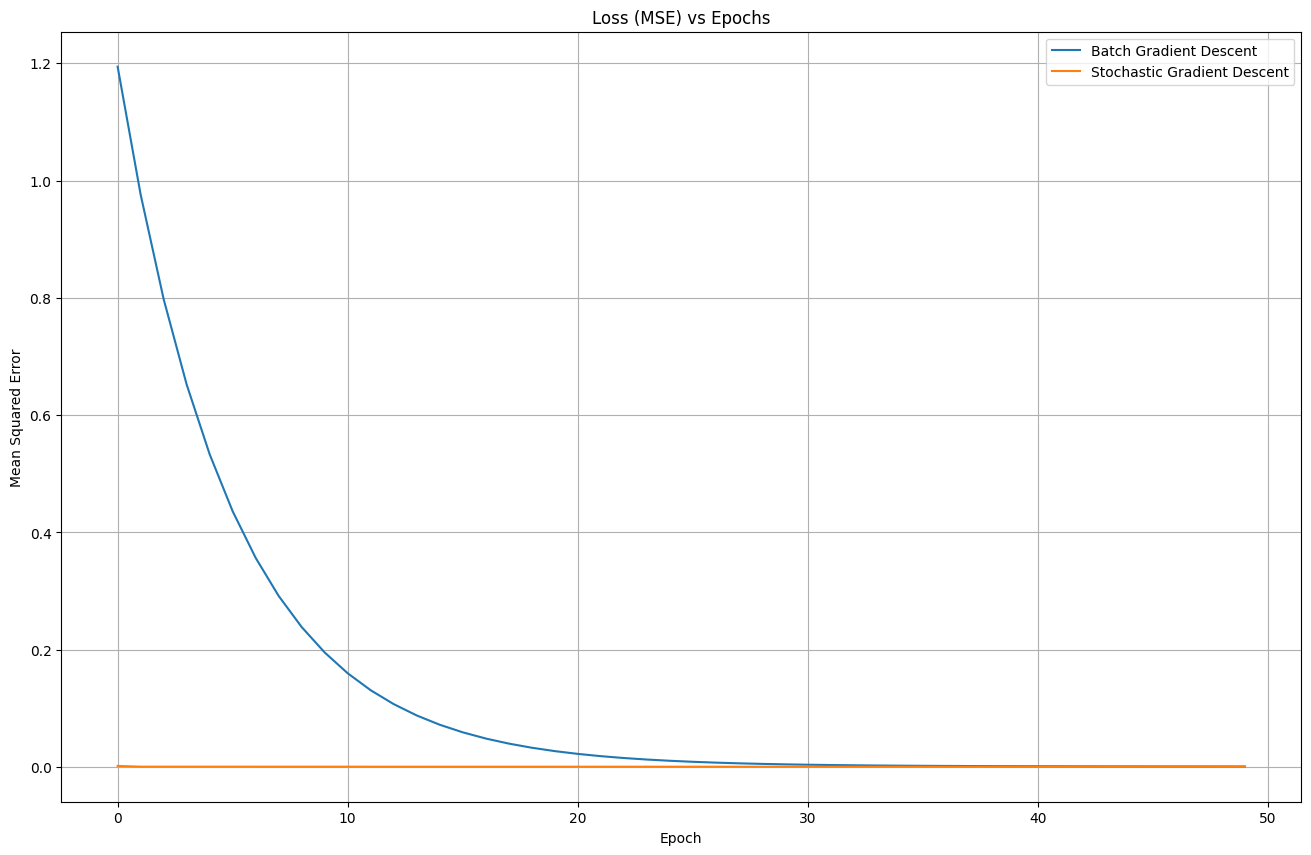

In [63]:
plt.figure(figsize=(16, 10))
plt.plot(loss_batch, label='Batch Gradient Descent')
plt.plot(loss_sgd, label='Stochastic Gradient Descent')
plt.title('Loss (MSE) vs Epochs')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)
plt.show()

## Final Test Set Evaluation
We measure Mean Squared Error (MSE) on the test set to compare real-world predictive power of the learned models.  
Typically, SGD provides rapid convergence and comparable or better generalization for large-scale financial datasets.

In [64]:
# Use the learned weights and inverse scaling to evaluate
y_pred_batch = np.dot(X_test, w_batch)
y_pred_sgd = np.dot(X_test, w_sgd)

# Reverse normalization
y_test_inv = scaler_y.inverse_transform(y_test)
y_pred_batch_inv = scaler_y.inverse_transform(y_pred_batch)
y_pred_sgd_inv = scaler_y.inverse_transform(y_pred_sgd)

batch_mse = mean_squared_error(y_test_inv, y_pred_batch_inv)
sgd_mse = mean_squared_error(y_test_inv, y_pred_sgd_inv)
print(f'Batch Gradient Descent MSE: {batch_mse:.2f}')
print(f'Stochastic Gradient Descent MSE: {sgd_mse:.2f}')

Batch Gradient Descent MSE: 3.05
Stochastic Gradient Descent MSE: 2.14
